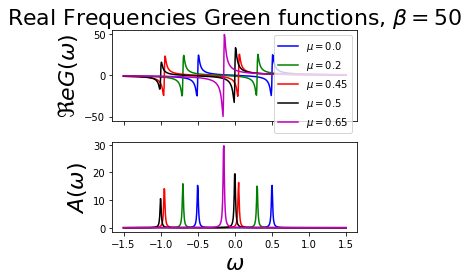

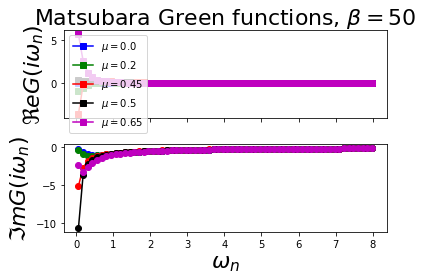

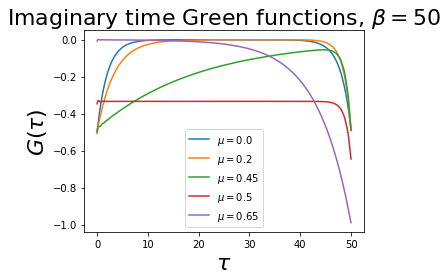

In [21]:
import plot_atom


In [9]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

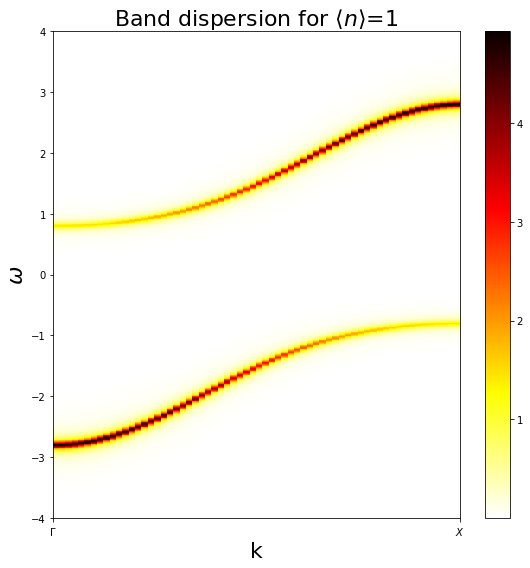

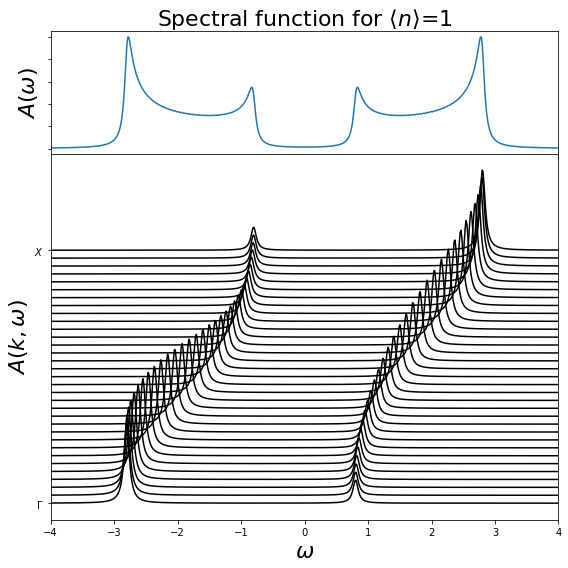

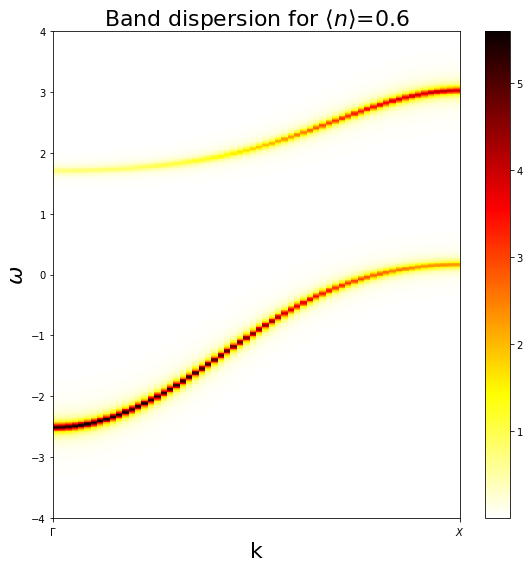

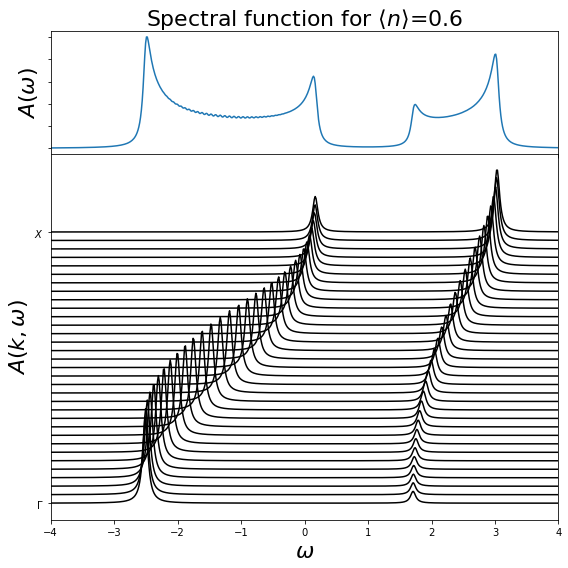

In [13]:
# %load plot_hubbardI.py
r"""
Hubbard I solver
================

Atomic limit expression of the self-energy
is described by

.. math:: \Sigma(\omega) =\frac{U n}{2} + \frac{ \frac{U^{2} n}{2} \left( 1 - \frac{n}{2}\right)}{\omega + \mu  - U \left(1 - \frac{n}{2}\right)}

This approximation is most accurate in the limit of strong coupling,
as there the atomic case is closer. Nevertheless it is possible to see
the formation of the Hubbard Bands and the redistribution of spectral
weight.
"""

# Created Mon Sep 28 15:25:30 2015
# Author: Óscar Nájera

from __future__ import division, absolute_import, print_function
import matplotlib.pyplot as plt
import numpy as np
plt.matplotlib.rcParams.update({'figure.figsize': (8, 8), 'axes.labelsize': 22,
                                'axes.titlesize': 22, 'figure.autolayout': True})


def hubbard_aprox(n, U, dmu, omega):

    k = np.linspace(0, np.pi, 65)

    mu = U/2 + dmu

    sigma = n*U/2 + n/2*(1-n/2)*U**2/(omega + 0.05j + mu - (1 - n/2)*U)
    eps_k = -2*np.cos(k)

    lat_gf = 1/(np.subtract.outer(omega + 0.05j + mu - sigma,  eps_k))
    A_kw = -lat_gf.imag/np.pi

    plt.figure()
    plt.pcolormesh(k, omega, A_kw , cmap='hot_r')
    plt.xticks([0, np.pi], [r'$\Gamma$', r'$X$'])
    plt.xlim([0, np.pi])
    plt.xlabel('k')
    plt.ylabel(r'$\omega$')
    plt.colorbar()
    plt.title(r'Band dispersion for $\langle n\rangle$=' + str(n))

    fig, ax = plt.subplots(2, 1, sharex=True,
                           gridspec_kw=dict(hspace=0, height_ratios=[1, 3]))
    A_kw /= np.max(A_kw)
    A_w = np.sum(A_kw, axis=1)

    ax[0].plot(omega, A_w/max(A_w))
    ax[0].set_ylabel(r'$A(\omega)$')
    ax[0].set_yticklabels([])
    ax[0].set_title(r'Spectral function for $\langle n\rangle$=' + str(n))
    A_kw += k

    ax[1].plot(omega, A_kw[:, ::2], 'k')
    ax[1].set_xlim([min(omega), max(omega)])
    ax[1].set_xlabel(r'$\omega$')
    ax[1].set_yticks([0, np.pi])
    ax[1].set_yticklabels([r'$\Gamma$', r'$X$'])
    ax[1].set_ylabel(r'$A(k, \omega)$')


###############################################################################
# Starting with the half-filling case where the system is particle hole
# symmetric and there is a simple way to describe the Fermi energy. For
# this simple ilustration the 1D problem is worked on as the Self-energy
# is still momentum independent.

omega = np.linspace(-4, 4, 600)
hubbard_aprox(1, 3, 0, omega)

###############################################################################
# When doping the system it is possible to see the spectral weight
# redistribution. How the less occupied band is wider.
#
# .. warning:: Chemical potential is not well set for the target occupation

hubbard_aprox(0.6, 3, -0.6, omega)


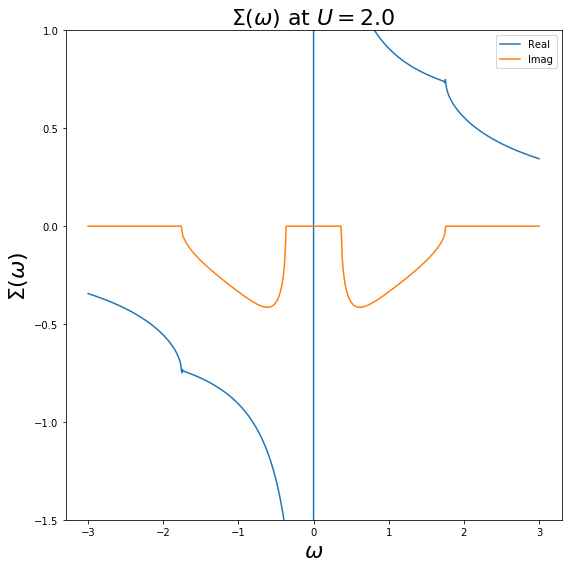

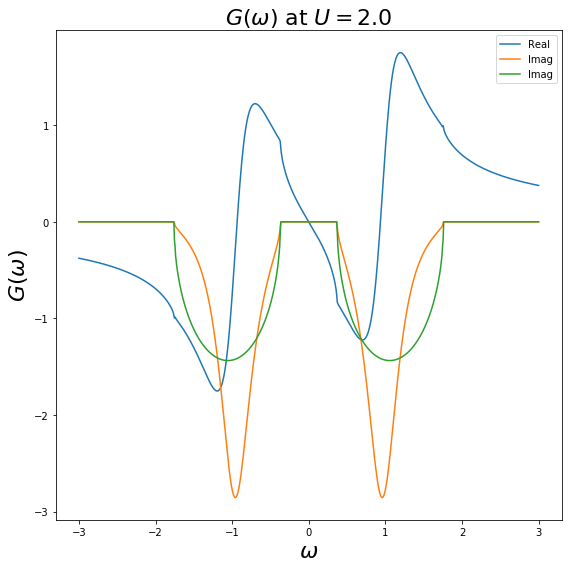

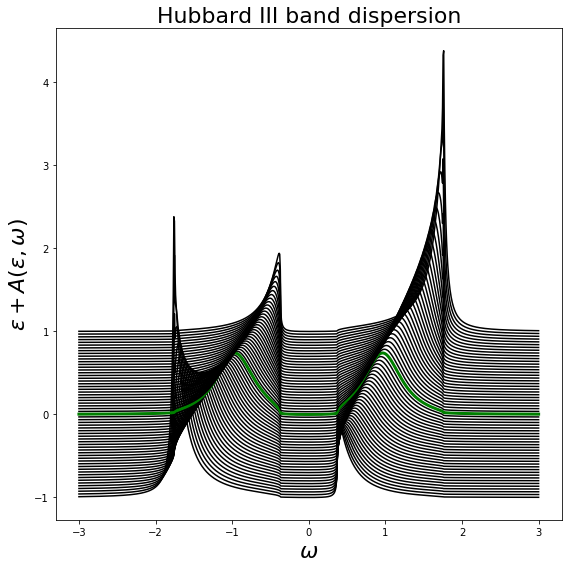

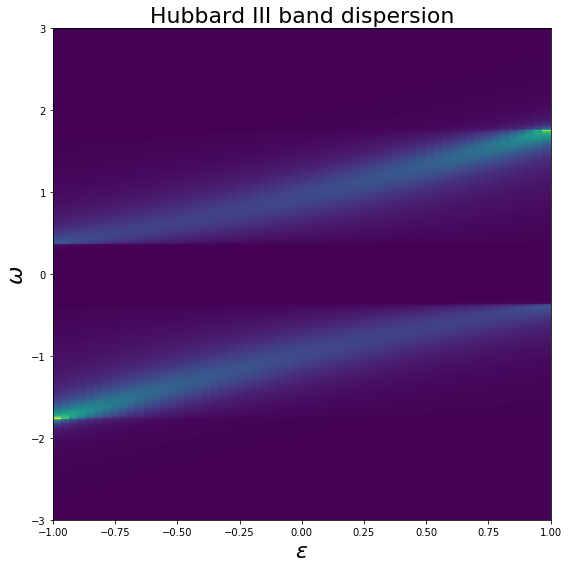

In [11]:
# %load plot_hubbardIII.py
r"""
=========================
Hubbard III approximation
=========================

In this approach the aim is to find the band dispersion of the
insulating system but including the effects of the bath. For this one
approximates the local Green's function by

.. math: G(\omega) = \frac{1}{\mathcal{G}_0^{-1}-\frac{U^2}{4\mathcal{G}_0^{-1}}}

And the using the self consistency equation of the Bethe lattice

.. math: \mathcal{G}_0^{-1}=\omega - t^2G

Here this equation can be solved analytically but for current purposes
 here it will be solved by fixed point iteration.
"""

# Created Fri Apr  1 14:44:59 2016
# Author: Óscar Nájera

from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt

import dmft.common as gf
from dmft.plot import plot_band_dispersion


w = np.linspace(-3, 3, 800)
g0_1 = w + 1e-6j
U = 2.

for i in range(2000):
    g0_1 = w - .25 / (g0_1 - U**2 / 4. / g0_1)

###############################################################################
# The Self-Energy
# ---------------

plt.figure()
plt.plot(w, (U**2 / 4 / g0_1).real, label=r"Real")
plt.plot(w, (U**2 / 4 / g0_1).imag, label=r"Imag")

plt.ylabel(r'$\Sigma(\omega)$')
plt.xlabel(r'$\omega$')
plt.title(r'$\Sigma(\omega)$ at $U= {}$'.format(U))
plt.legend(loc=0)
plt.ylim([-1.5, 1])


###############################################################################
# The Green Function
# ------------------

plt.figure()
plt.plot(w, (1 / (w - U**2 / 4 / g0_1)).real, label=r"Real")
plt.plot(w, (1 / (w - U**2 / 4 / g0_1)).imag, label=r"Imag")
plt.plot(w, (gf.semi_circle_hiltrans(w - U**2 / 4 / g0_1)).imag, label=r"Imag")

plt.ylabel(r'$G(\omega)$')
plt.xlabel(r'$\omega$')
plt.title(r'$G(\omega)$ at $U= {}$'.format(U))
plt.legend(loc=0)


###############################################################################
# The Band Dispersion
# -------------------

eps_k = np.linspace(-1, 1, 61)
lat_gf = 1 / (np.add.outer(-eps_k, w + 8e-2j) - U**2 / 4 / g0_1)
Aw = -lat_gf.imag / np.pi

plot_band_dispersion(w, Aw, 'Hubbard III band dispersion', eps_k)


In [3]:
!pwd

/home/dhl/pydmft/examples


In [3]:
%matplotlib inline

[67 61 62 61 59 57 55 53 51 49 47 45 44 42 41 39 38 37 37 37 38 38 38 39
 39 39 39 39 39 40 40 40 40 40 40 40 40 41 41 41 41 41 41 41 41 41 41 42
 42 42 42 42 42 42 42 42 42 42 43 43 43 43 43 43 43 43 43 43 44 44 44 44
 44 44 44 44 44 44 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 44 44 44 43 43 42 42 41 40 39 38 37 36 35 33 32 30 28 27 25 23
 21]
[68 64 66 67 66 65 64 62 60 58 56 54 52 50 49 47 46 44 43 42 42 43 43 44
 44 45 45 46 46 47 47 48 48 49 49 49 50 50 51 51 51 52 52 53 53 53 54 54
 54 55 55 55 56 56 56 57 57 57 58 58 58 59 59 59 59 60 60 60 60 61 61 61
 61 61 62 62 62 62 62 62 62 62 62 62 61 61 61 61 60 60 59 59 58 57 57 56
 55 54 53 52 51 49 48 47 45 44 42 41 39 38 36 34 33 31 29 28 26 24 22 21
 19]
[67 64 68 70 71 71 71 70 68 67 65 63 61 59 58 56 54 53 51 50 48 47 47 49
 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 70 71 72 73 75
 76 77 78 80 81 82 83 85 86 87 88 89 90 91 92 93 94 95 95 95 96 96 95 95
 94 94 93 92 91 89 88 86 84 83 81 79 77 7

AttributeError: 'AxesSubplot' object has no attribute 'set_color_cycle'

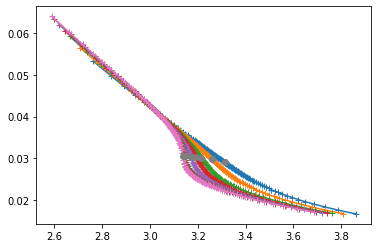

In [4]:
# %load ../dimer_lattice/plot_docc_transition.py
"""
Landau Theory of the Mott transition
====================================

Perform a fit of the order parameter, linked to double occupation to
match a Landau theory formulation in correspondence to Kotliar, G.,
Lange, E., & Rozenberg, M. J. (2000). Landau Theory of the Finite
Temperature Mott Transition. Phys. Rev. Lett., 84(22),
5180–5183. http://dx.doi.org/10.1103/PhysRevLett.84.5180

Study above the critical point
"""


from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import dmft.dimer as dimer
import dmft.common as gf
import dmft.ipt_imag as ipt


def loop_u_tp(u_range, tprange, beta, seed='mott gap'):
    tau, w_n = gf.tau_wn_setup(dict(BETA=beta, N_MATSUBARA=256))
    giw_d, giw_o = dimer.gf_met(w_n, 0., 0., 0.5, 0.)
    if seed == 'ins':
        giw_d, giw_o = 1 / (1j * w_n + 4j / w_n), np.zeros_like(w_n) + 0j

    giw_s = []
    sigma_iw = []
    ekin, epot = [], []
    iterations = []
    for u_int, tp in zip(u_range, tprange):
        giw_d, giw_o, loops = dimer.ipt_dmft_loop(
            beta, u_int, tp, giw_d, giw_o, tau, w_n)
        giw_s.append((giw_d, giw_o))
        iterations.append(loops)
        g0iw_d, g0iw_o = dimer.self_consistency(
            1j * w_n, 1j * giw_d.imag, giw_o.real, 0., tp, 0.25)
        siw_d, siw_o = ipt.dimer_sigma(u_int, tp, g0iw_d, g0iw_o, tau, w_n)
        sigma_iw.append((siw_d.copy(), siw_o.copy()))

        ekin.append(dimer.ekin(giw_d, giw_o, w_n, tp, beta))

        epot.append(dimer.epot(giw_d, w_n, beta, u_int **
                               2 / 4 + tp**2, ekin[-1], u_int))
    print(np.array(iterations))
    # last division in energies because I want per spin epot
    return np.array(giw_s), np.array(sigma_iw), np.array(ekin) / 4, np.array(epot) / 4, w_n


# calculating multiple regions
fac = np.arctan(.55 * np.sqrt(3) / .15)
udelta = np.tan(np.linspace(-fac, fac, 121)) * .15 / np.sqrt(3)
dudelta = np.diff(udelta)
bet_uc = [(18, 3.312),
          (19, 3.258),
          (20, 3.214),
          (20.5, 3.193),
          (21, 3.17),
          (21.5, 3.1467),
          (21.7, 3.138)]

data = []
for beta, uc in bet_uc:
    urange = udelta + uc + .07
    giw_s, sigma_iw, ekin, epot, w_n = loop_u_tp(
        urange, .3 * np.ones_like(urange), beta, 'met')
    data.append(2 * epot / urange - 0.003)

plt.figure()
bc = [b for b, _ in bet_uc]
d_c = [dc[int(len(udelta) / 2)] for dc in data]
for dd, dc, (beta, uc) in zip(data, d_c, bet_uc):
    plt.plot(uc + udelta, dd, '+-', label=r'$\beta={}$'.format(beta))

plt.plot([uc for _, uc in bet_uc], d_c, 'o')

plt.gca().set_color_cycle(None)
for dd, (beta, uc) in zip(data, bet_uc):
    chi = np.diff(dd) / dudelta
    plt.plot(uc + udelta[:-1], chi / np.min(chi) * .035, ':')

plt.title(r'Double occupation')
plt.ylabel(r'$\langle n_\uparrow n_\downarrow \rangle$')
plt.xlabel(r'$U/D$')
plt.legend()
plt.savefig("dimer_tp0.3_docc.pdf",
            transparent=False, bbox_inches='tight', pad_inches=0.05)

# effective scaling
# cubic + linear over constant + linear


def fit_cube_lin(eta, c, p, q, s):
    return (c * eta**3 + p * eta + s) / (1 + q * eta)


plt.figure()
for dd, dc, (beta, uc) in zip(data, d_c, bet_uc):
    plt.plot(udelta, dd - dc, lw=2)

plt.gca().set_color_cycle(None)
bb = [10, 30, 35, 42, 45, 48, 50]
fits = []
for dd, dc, bound, (beta, uc) in zip(data, d_c, bb, bet_uc):
    rd = dd - dc
    popt, pcov = curve_fit(
        fit_cube_lin, rd[bound:-bound], udelta[bound:-bound], p0=[-4e4, -3, 3, 1])
    fits.append((popt, pcov))
    ft = fit_cube_lin(rd, *popt)
    plt.plot(ft, rd, label=r'$\beta={}$'.format(beta))
    plt.plot(ft[bound:-bound], rd[bound:-bound], "k+")
    print(popt)

plt.xlim([-.08, .08])
plt.ylim([-.007, .01])

plt.title(r'Reduced Double occupation fitted to theory')
plt.ylabel(r'$\eta$')
plt.xlabel(r'$U-U_c$')
plt.legend()
plt.savefig("dimer_tp0.3_eta_landau.pdf",
            transparent=False, bbox_inches='tight', pad_inches=0.05)


In [10]:
%matplotlib inline


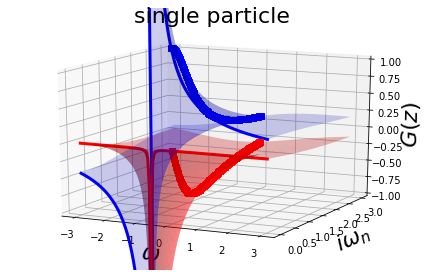

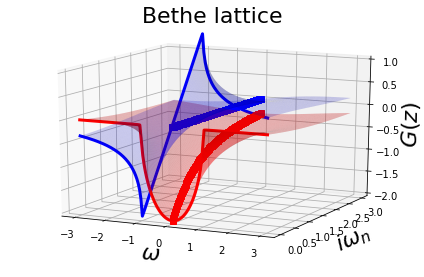

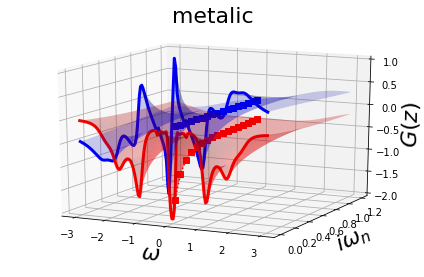

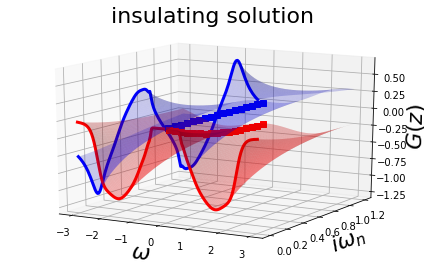

In [20]:
# %load ./IPT/plot_analytical_structure_gf.py
r"""
==================================================
The Analytical Structure of a the Green's Function
==================================================

Here I plot the form of the Green's function in the upper complex
plane. To show the connection between the Matsubara Green's function
an the real frequency retarded Green's function.
"""

# Created Sat Aug 13 23:55:28 2016
# Author: Óscar Nájera

from __future__ import division, absolute_import, print_function

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from dmft.ipt_imag import dmft_loop
from dmft.common import greenF, tau_wn_setup, pade_coefficients, pade_rec, semi_circle_hiltrans

plt.matplotlib.rcParams.update({'axes.labelsize': 22,
                                'axes.titlesize': 22, 'figure.autolayout': True})


def plot_complex_gf(omega, jomega, w_n, function, eps=1e-3):
    O, W = np.meshgrid(omega, np.concatenate(([eps], jomega)))
    Z = O + 1j * W

    green_func = function(Z)
    real_green_func = function(omega + 1j * eps)
    imag_green_func = function(1j * jomega)
    mats_green_func = function(1j * w_n)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(O, W, green_func.real, color='blue',
                           alpha=0.2, rstride=1, cstride=1, linewidth=0)
    surf = ax.plot_surface(O, W, green_func.imag,
                           color='red', alpha=0.3, rstride=1, cstride=1, linewidth=0)
    ax.plot(omega, np.zeros_like(omega), real_green_func.real, 'b-', lw=3)
    ax.plot(omega, np.zeros_like(omega), real_green_func.imag, 'r-', lw=3)

    ax.plot(np.zeros_like(w_n), w_n, mats_green_func.real, 'bs:')
    ax.plot(np.zeros_like(w_n), w_n, mats_green_func.imag, 'rs:')

    ax.set_xlabel(r'$\omega$')
    ax.set_ylabel(r'$i\omega_n$')
    ax.set_zlabel(r'$G(z)$')
    return ax

###############################################################################
# A free single particle
# ----------------------

omega = np.linspace(-3, 3, 150)
jomega = np.linspace(1e-4, 3, 100)
ax = plot_complex_gf(omega, jomega, jomega, lambda z: 1 / (z + 0.7))
ax.view_init(15, -64)
ax.set_zlim3d(-1., 1.)
plt.title('single particle')
###############################################################################
# The Semi-Circular Density of states
# -----------------------------------

ax = plot_complex_gf(omega, jomega, jomega, semi_circle_hiltrans)
ax.view_init(15, -64)
ax.set_zlim3d(-2., 1.)
plt.title('Bethe lattice')

###############################################################################
# Results from IPT
# ----------------
#
# Starting from the Metallic seed on the Bethe Lattice the DMFT
# equations are solved iteratively in by perturbation theory in the
# Matsubara axis. The resulting Green's function is then approximated
# by its Padé approximant which allows to evaluate it on the upper
# complex plane.

beta = 90.
U = 2.7
tau, w_n = tau_wn_setup(dict(BETA=beta, N_MATSUBARA=1024))
g_iwn0 = greenF(w_n)
g_iwn, s_iwn = dmft_loop(U, 0.5, g_iwn0, w_n, tau, conv=1e-12)
x = int(2 * beta)
w_set = np.arange(x)

pc = pade_coefficients(g_iwn[w_set], w_n[w_set])

ax = plot_complex_gf(omega, np.linspace(1e-3, 1.2, 30), w_n[:17],
                     lambda z: pade_rec(pc, z, w_n[w_set]))
ax.view_init(15, -64)
ax.set_zlim3d([-2, 1])
plt.title('metalic')
###############################################################################
# For the insulating solution

U = 3.2
tau, w_n = tau_wn_setup(dict(BETA=beta, N_MATSUBARA=1024))
g_iwn0 = greenF(w_n)
g_iwn, s_iwn = dmft_loop(
    U, 0.5, 1 / (1j * w_n - 1 / g_iwn0), w_n, tau, conv=1e-12)
x = int(2 * beta)
w_set = np.arange(x)

pc = pade_coefficients(g_iwn[w_set], w_n[w_set])

ax = plot_complex_gf(omega, np.linspace(1e-3, 1.2, 30), w_n[:17],
                     lambda z: pade_rec(pc, z, w_n[w_set]))
ax.view_init(15, -60)
ax.set_zlim3d([-1.3, 0.7])
plt.title('insulating solution')
###############################################################################
# I find it totally surprising how much information is contained in
# each version of the Greens function and how it forces the complete
# structure to obey it.
plt.show()

In [2]:
import os
os.getcwd()
# os.chdir(/home/dhl/pydmft/examples/IPT/)
os.chdir('./IPT/')
os.getcwd()
# import plot_mit.py

'/home/dhl/pydmft/examples/IPT'

In [3]:
import plot_mit.py

ModuleNotFoundError: No module named 'plot_mit.py'; 'plot_mit' is not a package

#### change of G'f by each loop

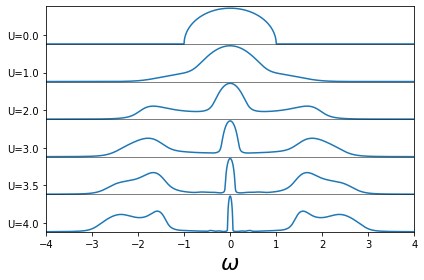

In [2]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
%matplotlib inline

w = np.linspace(-4, 4, 2**12)
gloc = gf.semi_circle_hiltrans(w + 1e-3j)

urange = [0.0, 1., 2., 3., 3.5, 4.]
plt.close('all')
for i, U in enumerate(urange):
    gloc, sigma_loc = ipt.ss_dmft_loop_once(gloc, w, U, 400, 1e-5)

    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
    plt.axhline(shift, color='k', lw=0.5)

plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(urange)), ['U=' + str(u) for u in urange])
plt.show()

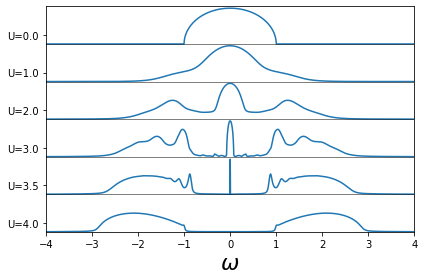

In [3]:
# %load plot_mit.py
r"""
===================================
The Metal Mott Insulator transition
===================================

Using a real frequency IPT solver follow the spectral function along
the metal to insulator transition.

"""
from __future__ import division, absolute_import, print_function

import numpy as np
import matplotlib.pylab as plt

import dmft.common as gf
import dmft.ipt_real as ipt
%matplotlib inline

w = np.linspace(-4, 4, 2**12)
gloc = gf.semi_circle_hiltrans(w + 1e-3j)

urange = [0.0, 1., 2., 3., 3.5, 4.]
plt.close('all')
for i, U in enumerate(urange):
    gloc, sigma_loc = ipt.ss_dmft_loop(gloc, w, U, 400, 1e-5)

    plt.gca().set_prop_cycle(None)
    shift = -2.1 * i
    plt.plot(w, shift + -gloc.imag)
    plt.axhline(shift, color='k', lw=0.5)

plt.xlabel(r'$\omega$')
plt.xlim([-4, 4])
plt.ylim([shift, 2.1])
plt.yticks(0.5 - 2.1 * np.arange(len(urange)), ['U=' + str(u) for u in urange])
plt.show()